# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import sys
import random
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [27]:
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

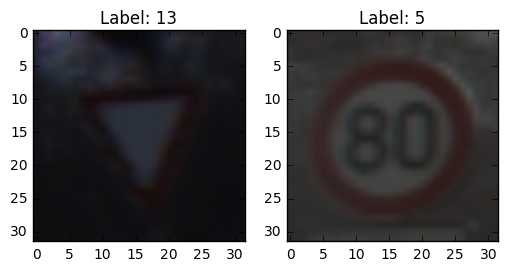

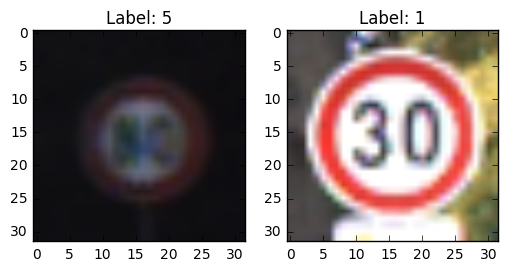

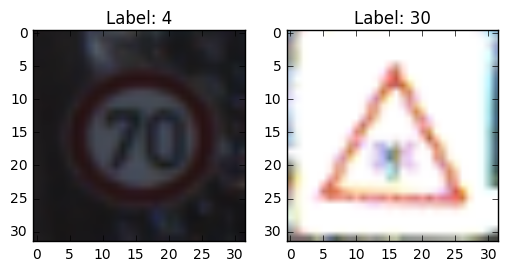

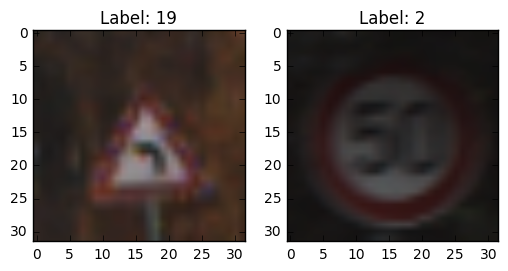

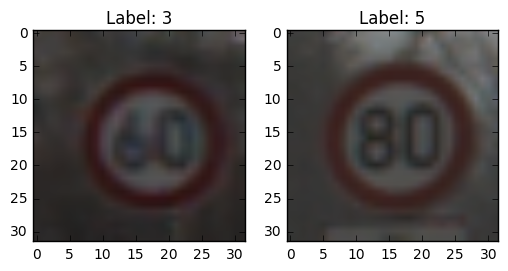

In [21]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

for i in range(5):
  selected_image_train = random.randint(0, X_train.shape[0]-1)
  selected_image_test = random.randint(0, X_test.shape[0]-1)

  plt.subplot(1, 2, 1)
  plt.imshow(X_train[selected_image_train])
  plt.title('Label: ' + str(y_train[selected_image_train]))

  plt.subplot(1, 2, 2)
  plt.imshow(X_test[selected_image_test])
  plt.title('Label: ' + str(y_test[selected_image_test]))

  plt.show()

In [29]:
import csv
with open('signnames.csv', 'rt') as f:
    spamreader = csv.DictReader(f, delimiter=',', quotechar='|')
    signname = [ row['SignName'] for row in spamreader]
print(signname)

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
tf_preprocessing = False

if tf_preprocessing:
  def image_adjustments(image):
    image = tf.image.adjust_brightness(image, 0.5)
    image = tf.image.adjust_contrast(image, 0.5)
    image = tf.image.per_image_whitening(image)
    return image

  def images_processing(images, color=True):
    if not color:
      grayscale = tf.image.rgb_to_grayscale(images)
      gcn = tf.map_fn(image_adjustments, grayscale)
      return gcn
    else:
      return images

  tf_train_dataset = tf.Variable(X_train.astype(np.float32))
  tf_test_dataset = tf.Variable(X_test.astype(np.float32))

  tfp_train_dataset = images_processing(tf_train_dataset, color=False)
  tfp_test_dataset = images_processing(tf_test_dataset, color=False)

  sess = tf.Session()
  sess.run(tf.global_variables_initializer())
  X_train, X_test = sess.run([tfp_train_dataset, tfp_test_dataset])

  print('Done')

In [ ]:
preprocessing = True

if preprocessing:
  def color_processing(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    y,u,v=cv2.split(yuv)
    y=(y-y.min())*(255./(y.max()-y.min()))
    y=y.astype(np.uint8)
    yuv=cv2.merge((y,u,v))
    return yuv
  
  def images_processing(images):
    images = map(color_processing, images)
    return list(images)

  X_train = np.array(images_processing(X_train))
  X_test = np.array(images_processing(X_test))

  print('Done')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The first approach was focused on converting the images to grayscale and adjust the values of contrast and brightness. As it is explained later, training our model with grayscale images tends to generalize worse at the end so for that reason it was decided to keep the color channels in the images.
It can be said that the model loses some information when is feeded just with grayscale images.
From Yann Lecun's 'Traffic Sign Recognition with Multi-Scale Convolutional Networks' paper we took the idea of convert the images to YUV space and normalize the Y channel.

Based on the final results it was decided to keep this concept and train our model with this preprocessed data.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [31]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [32]:
def check_shape():
  print('Training set', X_train.shape, y_train.shape)
  print('Test set', X_test.shape, y_test.shape)
  print('Validation set', X_validation.shape, y_validation.shape)
  
check_shape()  

Training set (31367, 32, 32, 3) (31367,)
Test set (12630, 32, 32, 3) (12630,)
Validation set (7842, 32, 32, 3) (7842,)


In [ ]:
if True:
  # TODO -> DATA TO PICKLE?
  pickle_file = './data/traffic-color-yuv.pickle'

  try:
    f = open(pickle_file, 'wb')
    save = {
      'X_train': X_train,
      'y_train': y_train,
      'X_test': X_test,
      'y_test': y_test,
      'X_validation': X_validation,
      'y_validation': y_validation,
      }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
  except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

  statinfo = os.stat(pickle_file)
  print('Compressed pickle size:', statinfo.st_size)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The validation set was created from the training one just taking the 20% of its data. It was also defined a random state value in order to avoid taking all the samples with the same labels.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [1]:
# Load pickled data
import pickle
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import sys
import random
import cv2
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from scipy import ndimage

EPOCHS = 50
BATCH_SIZE = 64
IMAGE_SIZE = 32
IMAGE_CHANNELS = 3
NUM_CLASSES = 43

pickle_file = './data/traffic-color-yuv.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train = save['X_train']
  y_train = save['y_train']
  X_test = save['X_test']
  y_test = save['y_test']
  X_validation = save['X_validation']
  y_validation = save['y_validation']
  del save  # hint to help gc free up memory
  print('Training set', X_train.shape, y_train.shape)
  print('Test set', X_test.shape, y_test.shape)
  print('Validation set', X_validation.shape, y_validation.shape)

Training set (31367, 32, 32, 3) (31367,)
Test set (12630, 32, 32, 3) (12630,)
Validation set (7842, 32, 32, 3) (7842,)


In [2]:
def model(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # CONV1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, IMAGE_CHANNELS, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma))
    conv1_W_1 = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 6), mean = mu, stddev = sigma))
    conv1_b_1 = tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma))
    conv1_W_2 = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 6), mean = mu, stddev = sigma))
    conv1_b_2 = tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma))
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID'), conv1_b)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.bias_add(tf.nn.conv2d(conv1, conv1_W_1, strides=[1, 1, 1, 1], padding='VALID'), conv1_b_1)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.bias_add(tf.nn.conv2d(conv1, conv1_W_2, strides=[1, 1, 1, 1], padding='VALID'), conv1_b_2)
    conv1 = tf.nn.elu(conv1)
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.local_response_normalization(conv1)

    # CONV2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma))
    conv2_W_1 = tf.Variable(tf.truncated_normal(shape=(1, 1, 16, 16), mean = mu, stddev = sigma))
    conv2_b_1 = tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma))
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID'), conv2_b)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv2, conv2_W_1, strides=[1, 1, 1, 1], padding='VALID'), conv2_b_1)
    conv2 = tf.nn.elu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.local_response_normalization(conv2)

    fc0   = flatten(conv2)
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # FC1
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.truncated_normal([120], mean = mu, stddev = sigma))
    fc1 = tf.nn.bias_add(tf.matmul(fc0, fc1_W), fc1_b)
    fc1 = tf.nn.relu(fc1)

    # FC2
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.truncated_normal([84], mean = mu, stddev = sigma))
    fc2 = tf.nn.bias_add(tf.matmul(fc1, fc2_W), fc2_b)
    fc2 = tf.nn.relu(fc2)

    # FC3
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, NUM_CLASSES), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.truncated_normal([NUM_CLASSES], mean = mu, stddev = sigma))
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The model was based on LeNet architecture and different aspects of it were modified in order to improve the performance of the model.

As it was mentioned before the first model received grayscale images, from there, we tested the same model with color images. At that point we defined the 'base model' taking the best of them and after that we applied some useful techniques to analyze their effects in the model.

- First Model: Grayscale Images + LeNet -> Test Accuracy: 89.2%
- Second Model: Grayscale Images + LeNet + 0.5 Dropout -> 93.1%
- Third Model: Color Images + LeNet -> 89.3%
- Fourth Model: Color Images + Lenet + 0.5 Dropout -> 93.7%

Considering these values it was decided to take the last one as "base model". 
The next steps were focused on apply the mentioned techniques.

- Base + set biases as truncated_normal variables -> significant improvement
- Base + modify the std deviation of the normal distributed variables to 0.01 -> not significant improvement
- Base + set a local normalization phase after convolutional phases -> worse performance
- Base + change all activation functions to elu's -> worse performance
- Base + add 1x1 conv layers after the convolutional phases -> worse performance
- Base + use YUV images instead of RGB Images -> improvement of 0.3% approx

After all of these experiments, we decided to change the strategy in favour of including some of these techniques in a subtle way.

Said that, the next steps in the process were:
- Change the activation functions just before the pooling phase in the convolutional layer (relus for elus)
- Add 2 1x1 convolutional layers in the fist conv layer and only 1 1x1 convolutional layer in the second one)
- Combining Avg and Max pooling (max pooling in the second layer)
- Setting again the local normalization after the convolutional layers and after the pooling phase

Once the final model was built and trained the performance improved from 94% to 95.7%.

The final architecture had the following layers:

5x5x6 ConvLayer -> 1x1x6 ConvLayer -> 1x1x6 ConvLayer -> AvgPooling -> LocalNormalization ->
-> 5x5x16 ConvLayer -> 1x1x16 ConvLayer -> MaxPooling -> LocalNormalization -> Dropout(0.5) -> FullyConnected_120 ->
FullyConnected_84 -> FullyConnected_43


In [3]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [4]:
graph = tf.Graph()

with graph.as_default():

  x = tf.placeholder(tf.float32, (None, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
  y = tf.placeholder(tf.int32, (None))

  keep_prob = tf.placeholder(tf.float32)
  one_hot_y = tf.one_hot(y, NUM_CLASSES)
  
  learning_rate = 0.0005

  # Training computation.
  logits = model(x)
  cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
  loss = tf.reduce_mean(cross_entropy)

  # Optimizer.
  optimizer = tf.train.AdamOptimizer(learning_rate)
  training_operation = optimizer.minimize(loss)
  
  # Batch Evaluation
  correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
  accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  prediction_values = tf.argmax(tf.nn.softmax(logits), 1)
  top_probabilities = tf.nn.top_k(tf.nn.softmax(logits), k=3)

  def evaluate(X_data, y_data):
      num_examples = len(X_data)
      total_accuracy = 0
      sess = tf.get_default_session()
      for offset in range(0, num_examples, BATCH_SIZE):
          batch_data, batch_labels = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
          accuracy = sess.run(accuracy_operation, feed_dict={x: batch_data, y: batch_labels, keep_prob: 1.0})
          total_accuracy += (accuracy * len(batch_data))
      return total_accuracy / num_examples
    
  def predict_evaluate(X_data, y_data):
      num_examples = len(X_data)
      total_accuracy = 0
      sess = tf.get_default_session()
      for offset in range(0, num_examples, BATCH_SIZE):
          batch_data, batch_labels = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
          accuracy, predictions, top = sess.run([accuracy_operation, prediction_values, top_probabilities], feed_dict={x: batch_data, y: batch_labels, keep_prob: 1.0})
          total_accuracy += (accuracy * len(batch_data))
      return total_accuracy / num_examples, predictions, top  
    
  saver = tf.train.Saver()

In [ ]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    #sp = saver.restore(sess, "./tmp/lenet-1")
    #print('Model Restored')
    #print('Initialized')
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_data, batch_labels = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_data, y: batch_labels, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, './tmp/final-model/model')
    print("Model saved")

In [5]:
with tf.Session(graph=graph) as sess:
    loader = tf.train.import_meta_graph('./tmp/final-model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./tmp/final-model/'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.956


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** One of the key points here was to choose the correct optimizer in the training phase. In this case LeNet architecture suggests AdamOptimizer as one of the best.

We evaluated all the different models and their variations setting these parameters:
- BATCH_SIZE: 64
- EPOCHS: 40
- LEARNING_RATE: from 0.001 to 0.0001 (final value of 0.0005)
- TRUNCATED_NORMAL_MEAN: 0
- TRUNCATED_NORMAL_STDDEV: 0.1

Once the final model was built, we trained it for 50 EPOCHS instead of 40.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** The initial version of the model was a clone of the famous and consolidated solution 'LeNet architecture'. For that reason the solution to the problem was rapidly reached, however the main goal here was to find the correct tools to improve the basic approach to something more worked and sophisticated.

Applying the studied techniques in the course was totally a trial and error process as it was explained. At the end, the best way to improve the model wasn't the brute force, and every technique had to be analyzed before apply it.

The combination of some of them in a correct way was the key to improve the model and finally find a stable solution to the problem.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

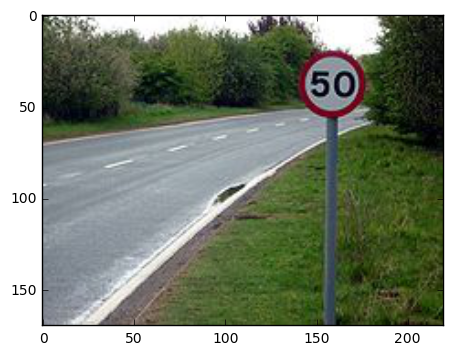

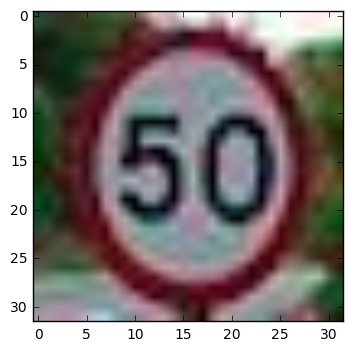

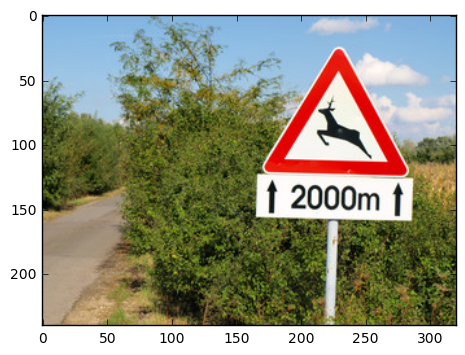

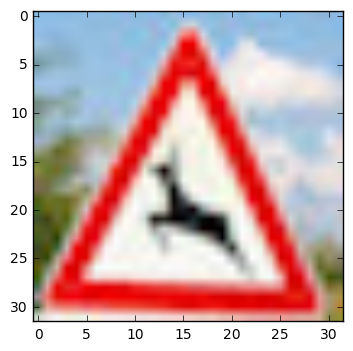

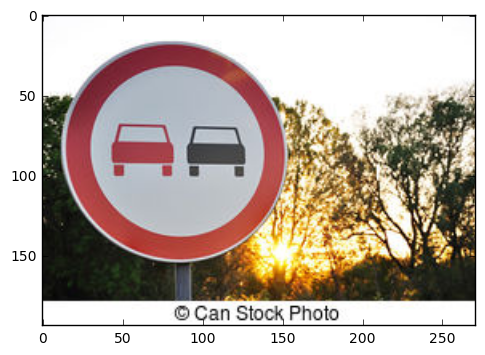

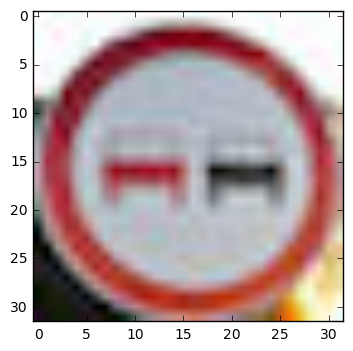

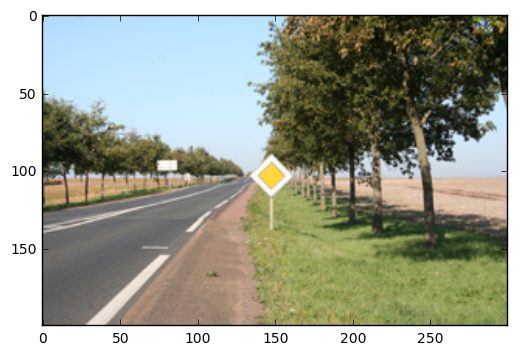

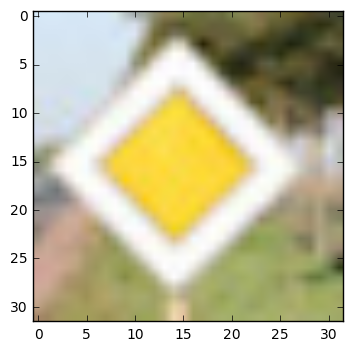

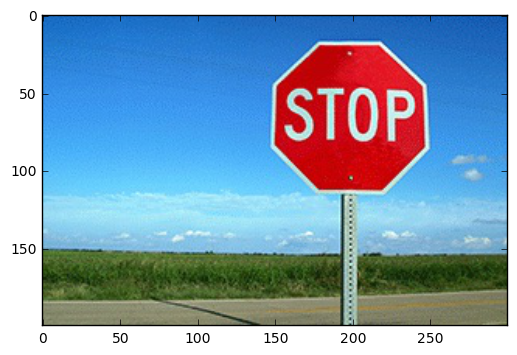

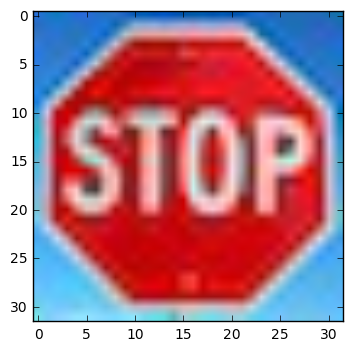

In [11]:
images = [
  ['50-speed-limit.jpg', 2],
  ['animals-crossing.jpg', 31],
  ['no-passing.jpg', 9],
  ['priority-road.jpg', 12],
  ['stop.jpg', 14]
]

for image in images:
  plt.imshow(ndimage.imread('./images/raw/'+image[0]))
  plt.show()
  plt.imshow(ndimage.imread('./images/cropped/'+image[0]))
  plt.show()

In [12]:
def create_prediction_set(images):
  data = []
  labels = []
  for image in images:
    data.append(ndimage.imread('./images/cropped/'+image[0]))
    labels.append(image[1])
  data = np.array(data)
  labels = np.array(labels).astype(np.float32)  
  return data, labels.reshape(labels.shape[0],)

X_samples, y_samples = create_prediction_set(images)  
print('Samples set', X_samples.shape, y_samples.shape)

preprocessing = True

if preprocessing:
  def color_processing(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    y,u,v=cv2.split(yuv)
    y=(y-y.min())*(255./(y.max()-y.min()))
    y=y.astype(np.uint8)
    yuv=cv2.merge((y,u,v))
    return yuv
  
  def images_processing(images):
    images = map(color_processing, images)
    return list(images)

  X_samples = np.array(images_processing(X_samples))

  print('Done')

Samples set (5, 32, 32, 3) (5,)
Done


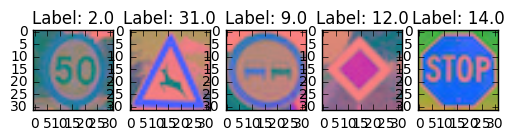

In [13]:
for i in range(X_samples.shape[0]):
  plt.subplot(1, X_samples.shape[0], i+1)
  plt.imshow(X_samples[i])
  plt.title('Label: ' + str(y_samples[i]))
  
  if i == X_samples.shape[0]-1:
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The chosen images are quite normal. One important aspect at this point was that the images had to be preprocessed equally than the images that the model was trained with. Above, the images are shown in three different steps of the preprocessed phase (original, cropped, YUV).

The images have, in general, a very good quality and the traffic signs can be easily identified. They keep a similar format than the images that were used to train the model. It is important to mention that the model would perform worse predicting 'real-world' images from a camera in a car (with rotation, blur, poor quality, etc)

Said that, it could be a good idea to generate additional data as it was suggested in order to avoid this problem and make the model more robust. 

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [14]:
import csv
with open('signnames.csv', 'rt') as f:
    spamreader = csv.DictReader(f, delimiter=',', quotechar='|')
    signs = {}
    for row in spamreader:
      signs[row['ClassId']] = row['SignName']
            
print(signs)

{'29': 'Bicycles crossing', '39': 'Keep left', '19': 'Dangerous curve to the left', '2': 'Speed limit (50km/h)', '27': 'Pedestrians', '28': 'Children crossing', '13': 'Yield', '38': 'Keep right', '22': 'Bumpy road', '0': 'Speed limit (20km/h)', '8': 'Speed limit (120km/h)', '37': 'Go straight or left', '40': 'Roundabout mandatory', '34': 'Turn left ahead', '21': 'Double curve', '35': 'Ahead only', '42': 'End of no passing by vehicles over 3.5 metric tons', '33': 'Turn right ahead', '18': 'General caution', '23': 'Slippery road', '11': 'Right-of-way at the next intersection', '4': 'Speed limit (70km/h)', '15': 'No vehicles', '31': 'Wild animals crossing', '5': 'Speed limit (80km/h)', '1': 'Speed limit (30km/h)', '20': 'Dangerous curve to the right', '9': 'No passing', '14': 'Stop', '3': 'Speed limit (60km/h)', '26': 'Traffic signals', '7': 'Speed limit (100km/h)', '16': 'Vehicles over 3.5 metric tons prohibited', '10': 'No passing for vehicles over 3.5 metric tons', '36': 'Go straight o

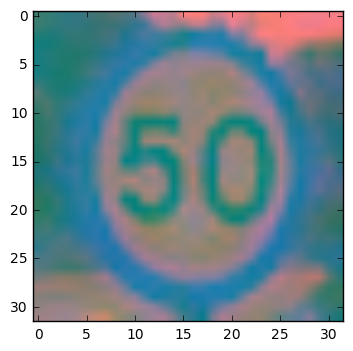

Real Value: Label:  2  that means:  Speed limit (50km/h)
Predicted Value: Label:  2  that means:  Speed limit (50km/h)


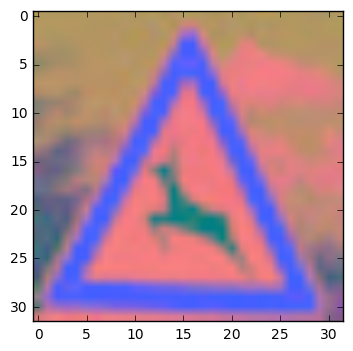

Real Value: Label:  31  that means:  Wild animals crossing
Predicted Value: Label:  21  that means:  Double curve


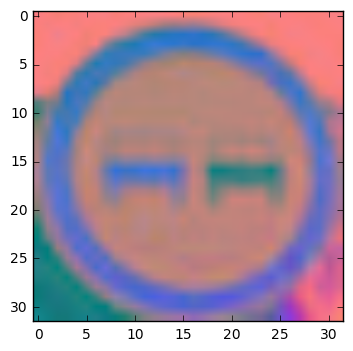

Real Value: Label:  9  that means:  No passing
Predicted Value: Label:  9  that means:  No passing


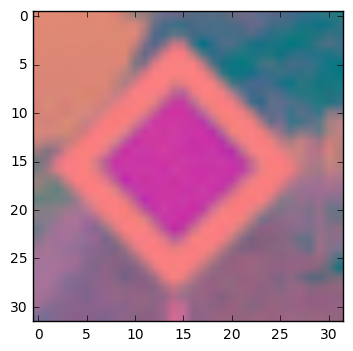

Real Value: Label:  12  that means:  Priority road
Predicted Value: Label:  12  that means:  Priority road


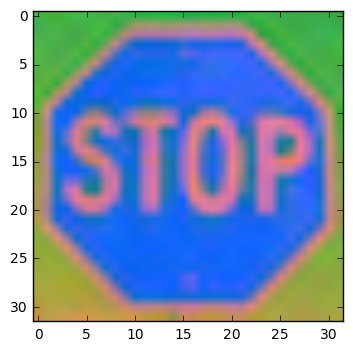

Real Value: Label:  14  that means:  Stop
Predicted Value: Label:  14  that means:  Stop
Samples Accuracy = 0.800


In [15]:
with tf.Session(graph=graph) as sess:
    loader = tf.train.import_meta_graph('./tmp/final-model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./tmp/final-model/'))

    samples_accuracy, predictions, top = predict_evaluate(X_samples, y_samples)
    
    for i in range(X_samples.shape[0]):
      plt.imshow(X_samples[i])
      plt.show()
      print('Real Value: Label: ', int(y_samples[i]), ' that means: ', signs[str(int(y_samples[i]))])
      print('Predicted Value: Label: ', int(predictions[i]), ' that means: ', signs[str(int(predictions[i]))])
    
    print("Samples Accuracy = {:.3f}".format(samples_accuracy))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** With these samples the model predicted 4 out of 5 signs correctly so it can be said that it's 80% accurate.
In the next question it's explained how the model could had almost predicted 5 out of 5 correctly.

We made the predictions with a very small group of images and just with a few labels of the dataset. Because of this, the variance of the accuracy can be greater in comparision with the test accuracy. Besides that, the chosen images were not from the original dataset so the performance could get worse also for that reason.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [16]:
with tf.Session(graph=graph) as sess:
    loader = tf.train.import_meta_graph('./tmp/final-model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./tmp/final-model/'))

    samples_accuracy, predictions, top = predict_evaluate(X_samples, y_samples)
    for i in range(X_samples.shape[0]):
      print('Image: ', i, 'top indices: ', top.indices[i], 'top values: ', top.values[i])

Image:  0 top indices:  [2 1 6] top values:  [  9.99567807e-01   1.45937389e-04   1.40209624e-04]
Image:  1 top indices:  [21 31 25] top values:  [ 0.51102263  0.4853048   0.00166231]
Image:  2 top indices:  [ 9 23 12] top values:  [ 0.96876782  0.02428321  0.00323145]
Image:  3 top indices:  [12 15 32] top values:  [  9.99999166e-01   4.71404348e-07   1.84481237e-07]
Image:  4 top indices:  [14  1  2] top values:  [ 0.8661235   0.11304796  0.01160945]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**: Pointing at the images that had been predicted correctly, it can be seen how the second "choice" was too far to be considered as an "alternative" to the model (low probabilities in comparition). But in the case of the incorrectly-predicted image:

Image:  1 top indices:  [21 31 25] top values:  [ 0.51102263  0.4853048   0.00166231]

The real value was 31 (animals crossing) instead of that, the model predicted 21(double curve) but just with 51.1% of chance vs 48.5% that had the second choice.

So in this case it could be said that the model was unsure when it predicted this image and it almost predicted it correcly, having then 100% of accuracy.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.